# CS50P Final Project

This is my final project in the course CS50P at HarvardX.  The intent of this program is to get 2 or more Company Tickers from user and plot their historical prices on a graph for comparison.  

The first step is to import the libraries we will need. 
For this application we will need four libraries:

pandas: A library for data manipulation and analysis, offering data structures like DataFrames for handling tabular data.

matplotlib: A plotting library that allows for creating a wide range of static, interactive, and animated visualizations.

datetime: A module in Python's standard library that supplies classes for manipulating dates and times, providing various time-related functions.

yfinance: A popular library for downloading historical market data from Yahoo Finance, allowing users to access stock quotes, historical prices, and other financial data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

Next we will define the main function, which is the essence of what my program will do.

As you can see below, first the program will get the tickers from user and call it, well, tickers, of course.  Then it will transform these tickers into a dataframe, which is the type of data that is used in mathplotlib.  Lastly it will plot this dataframe on a chart.  But it won't do it quite yet.  For now, it's just defining a function called main.

In [2]:
def main():
    tickers = get_tickers()
    df = prepare_dataframe(tickers)
    create_plot(df)

Note that, in main, in order to execute all the tasks necessary, it's calling other functions that don't really exist yet.  So in that case, let's create them.

The first one we'll create is a function that will demand from the user the Tickers of the stocks to compare.  It will first ask how many tickets and depending on the number entered by user it will ask n times what are the tickets.

In [3]:
def get_tickers():#function that will demand from the user the Tickers of the stocks to compare
    tickers = []
    num_tickers = int(input("Enter the number of tickers: "))#ask the number of Tickers

    for i in range(num_tickers):
        ticker = input(f"Enter ticker {i + 1}: ")#ask the tickers
        tickers.append(ticker.lower())

    return tickers

Now that we have defined how the program will ask for the tickets, we need to define a formula to transform the list of tickets in a Pandas dataFrame, which will be more handy to be used for plotting later.  We'll define the function prepare_dataframe below, and also, while in there we will transform the date of today in the same format used in YFinance so we can use the data for the chart.

In [4]:
def prepare_dataframe(tickers):#transform the list of tickers in a Pandas DataFrame, by pulling the historical prices with YFinance library
    df = pd.DataFrame()
    today = datetime.now().date().strftime("%Y-%m-%d")#transform the date of today in the same format used in YFinance

    for ticker in tickers:
        df[ticker] = yf.Ticker(ticker).history(start='2007-01-01', end=today).Close#Get the prices since 2007 until today
    return df


Now we have a dataFrame ready with comparables date formats, but we still need to have the relative performance of each stock, so they will be comparable between them.  We'll do that by dividing each stock's closing price by the closing price of the first day in the DataFrame. This gives a ratio that shows how much the stock price has changed over time relative to its initial value.  Of course as in any dataset, we will have flaws, and there are indeed some missing values.  In this case, we will take care of them by filling any missing values (NaN) with the last known value in the DataFrame, so that the relative performance calculation is complete for all dates. that is done with the fillna method.
So to address these two needs, we will define a function called calculate_relative_performance(df).

In [5]:
def calculate_relative_performance(df):
    return (df / df.iloc[0]).fillna(method='ffill')

The last function we need to create is the one that will use the DataFrame we created before and will use it to create a graph where we'll plot the Historic Performance of the Tickers in order to have a good comparison of them.  Below is the definition of the function create_plot, in which using matplotlib library we will be able to plot the dataFrame created in the step before into a comparison chart. 

In [6]:
def create_plot(df):#use the Dataframe to plot the historical prices in a chart
    relative_performance = calculate_relative_performance(df)
    plt.figure()

    for ticker in relative_performance.columns:
        plt.plot(relative_performance[ticker], label=ticker.upper())

    plt.ylabel('Price ($)')
    plt.xlabel('Year')
    plt.legend(loc='best')
    plt.show()

Now that we have defined all the functions, it's time to call the main function that we've defined in the beginning.  Because we've created the other functions before we called the main function, they will be excuted only now, and not when I defined the main function.

Enter the number of tickers: 2
Enter ticker 1: goog
Enter ticker 2: aapl


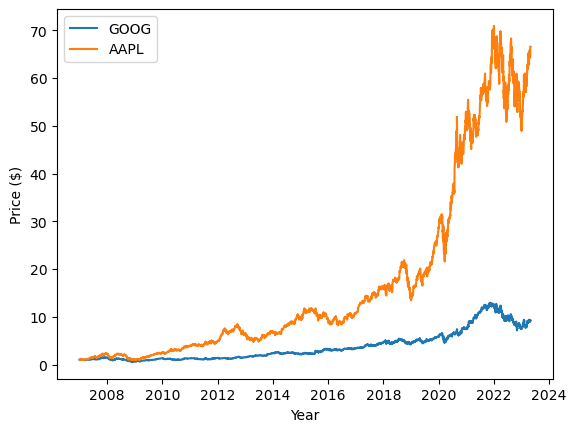

In [7]:
if __name__ == "__main__":
    main()
